(1, 50, 50, 50)


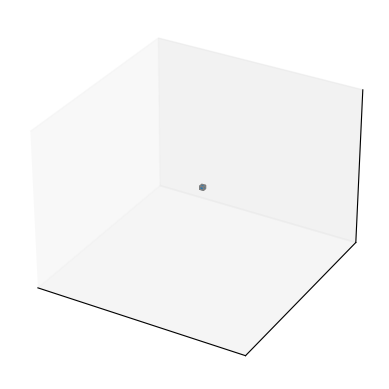

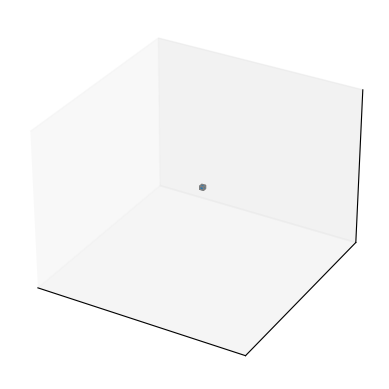

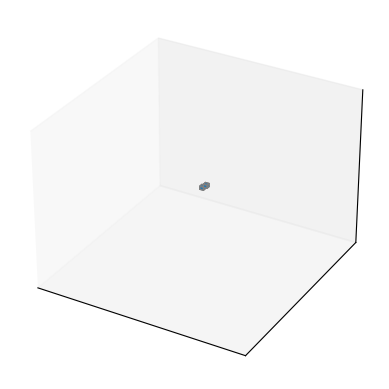

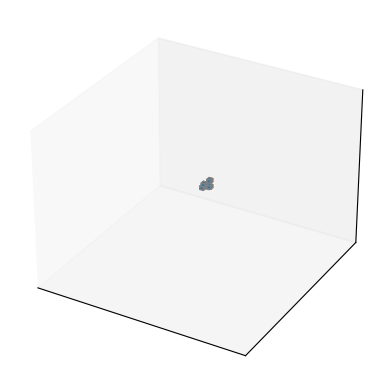

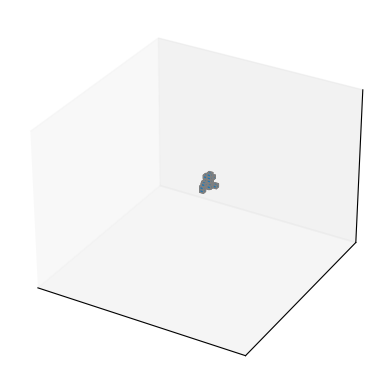

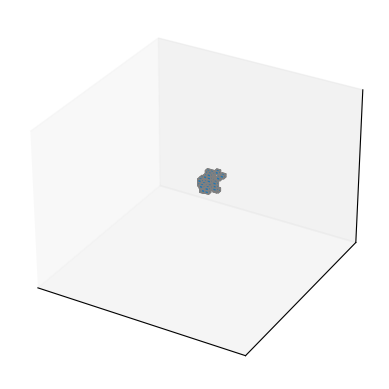

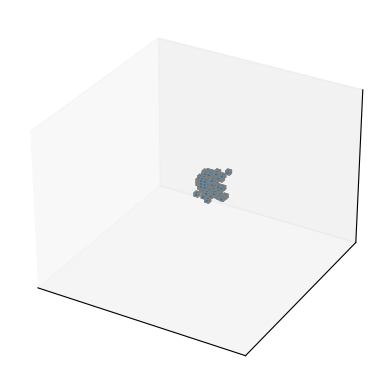

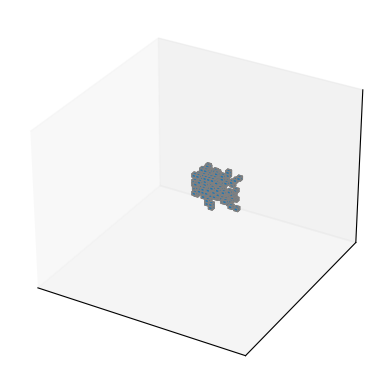

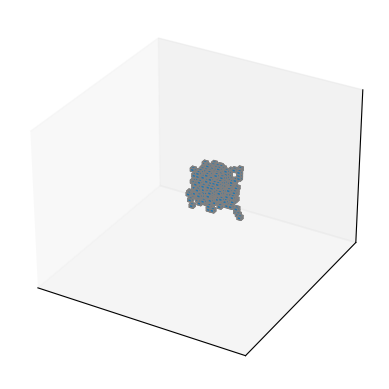

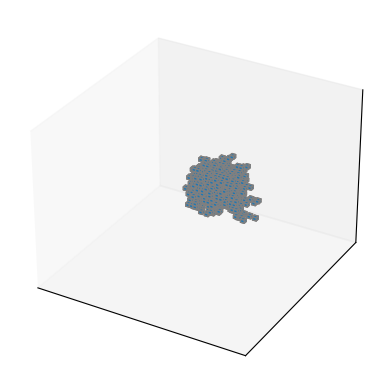

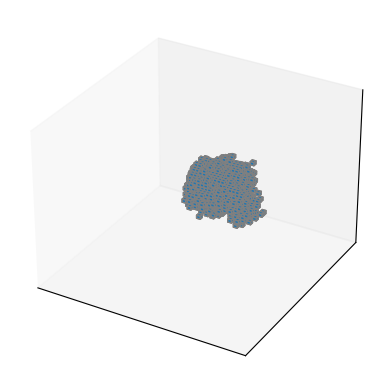

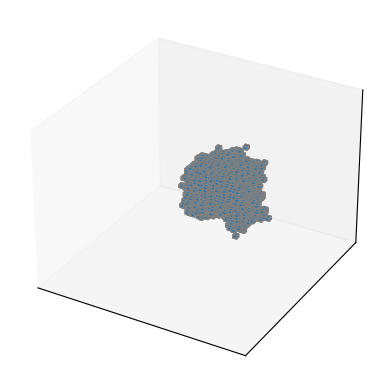

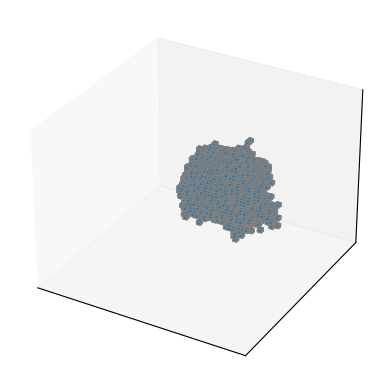

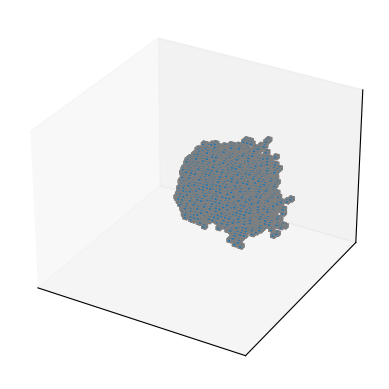

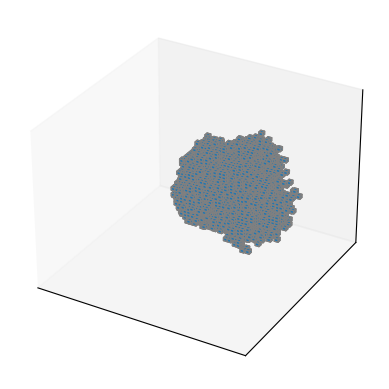

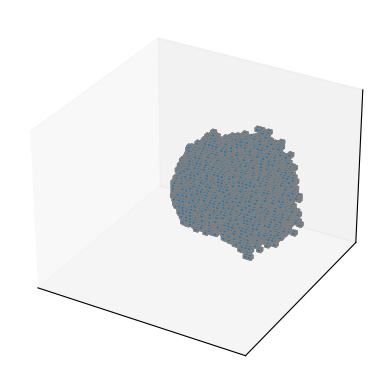

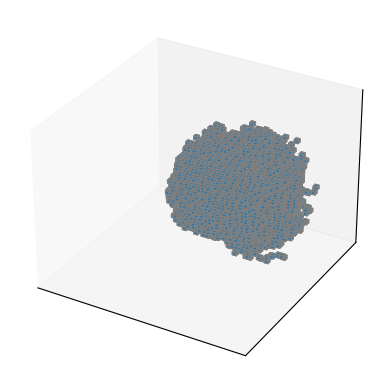

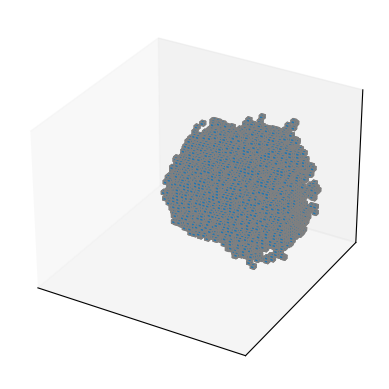

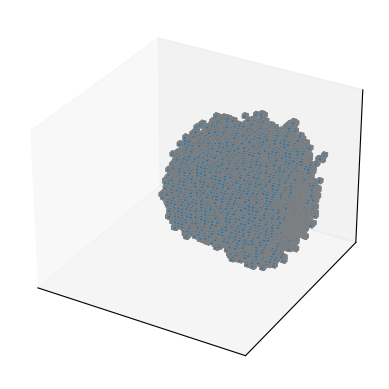

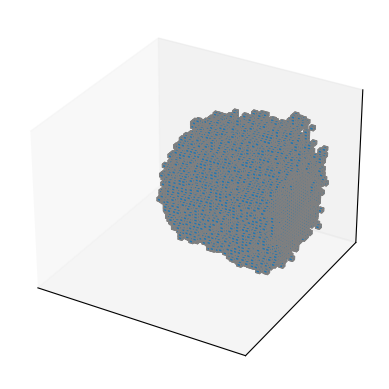

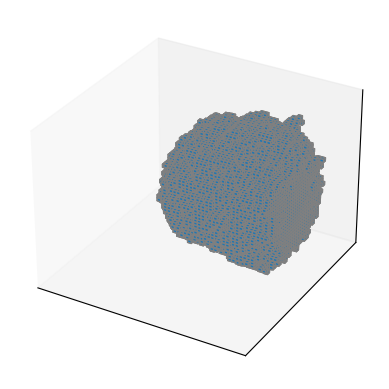

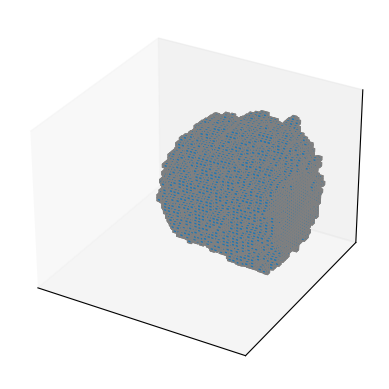

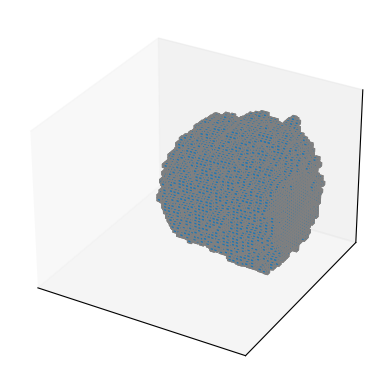

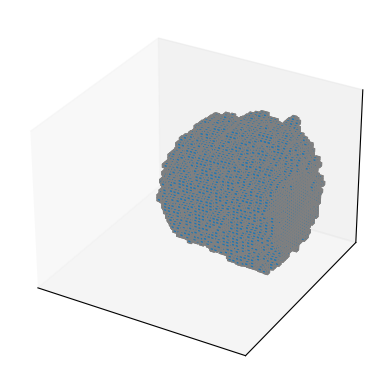

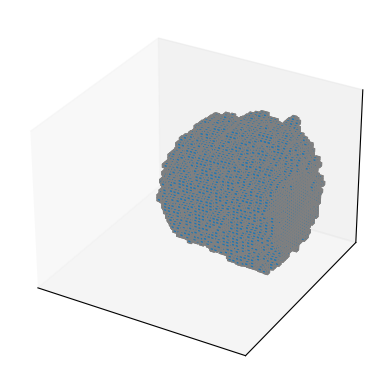

In [1]:
import cellpylib as cpl
import cellpylib3d as cpl3d
import argparse
from collections import defaultdict
import numpy as np
from random import choice 
from multiprocessing import Pool

#Generate Rule

class CustomRule(cpl.BaseRule):

    def __init__(self, g_steps,center):
        self.count = defaultdict(int)
        self.conv = {0:(0,0,0), 1:(0,0,1), 2:(0,0,2), 3:(0,1,0), 4:(0,1,1), 5:(0,1,2), 6:(0,2,0), 7:(0,2,1), 8:(0,2,2), 
                     9:(1,0,0), 10:(1,0,1), 11:(1,0,2), 12:(1,1,0), 13:(1,1,1), 14:(1,1,2), 15:(1,2,0), 16:(1,2,1), 17:(1,2,2),
                     18:(2,0,0), 19:(2,0,1), 20:(2,0,2), 21:(2,1,0), 22:(2,1,1), 23:(2,1,2), 24:(2,2,0), 25:(2,2,1), 26:(2,2,2)}
        # self.conv = {0:(0,0,1), 1:(0,1,0), 2:(0,1,2), 3:(0,2,1), 4:(1,0,1), 5:(1,1,0), 6:(1,1,2), 7:(1,2,1), 8:(2,0,1), 9:(2,1,0), 10:(2,1,2), 11:(2,2,1), 12:(1,1,1)}
        self.g_steps = g_steps
        self.center = center
    
    def __call__(self, n, c, t):
        # Generation stage
        if t < self.g_steps:
            Tumor = []
            if t == 1 :
                for i in range(27):
                    shift = (self.conv[i][0] - self.conv[13][0], self.conv[i][1] - self.conv[13][1], self.conv[i][2] - self.conv[13][2])
                    target_cell = (c[0]+shift[0], c[1]+shift[1], c[2]+shift[2])
                    if n[self.conv[i]] == 1:
                        self.count[target_cell] = 1
                return self.count[c]

            #find no tumor cells neighbours
            
            if self.count[c] == 1:
                for i in range(27):
                    if n[self.conv[i]] == 0:
                        Tumor.append(i)
                # for i in range(12):
                #     if n[self.conv[i]] == 0:
                #         shift = (self.conv[i][0] - self.conv[12][0], self.conv[i][1] - self.conv[12][1], self.conv[i][2] - self.conv[12][2])
                #         target_cell = (c[0]+shift[0], c[1]+shift[1], c[2]+shift[2])

                #         Tumor.append(i)
                #random selet a no tumor cell
                if len(Tumor) > 0:
                    index = choice(Tumor)
                    shift = (self.conv[index][0] - self.conv[13][0], self.conv[index][1] - self.conv[13][1], self.conv[index][2] - self.conv[13][2])
                    target_cell = (c[0]+shift[0], c[1]+shift[1], c[2]+shift[2])
                    self.count[target_cell] = 1
                # if len(Tumor) > 0:
                #     index = choice(Tumor)
                #     shift = (self.conv[index][0] - self.conv[12][0], self.conv[index][1] - self.conv[12][1], self.conv[index][2] - self.conv[12][2])
                #     target_cell = (c[0]+shift[0], c[1]+shift[1], c[2]+shift[2])
                #     self.count[target_cell] = 1
            
                return self.count[c]
            else:
                return self.count[c]
        # Post process stage
        else:
            if np.sum(n) > 5:
                return self.count[c]
            else: 
                self.count[c] = 0
                return self.count[c]


step = 25
post_steps = 5
generate_steps = step - post_steps
size = (50,50,50)
center = (20,20,20)
#init
cellular_automaton = cpl3d.init_simple3d(size[0], size[1], size[2])
print(cellular_automaton.shape)
rule = CustomRule(generate_steps,center)


# pool = Pool(12)
# #generate tumor
# for i in range(12):
#     cellular_automaton = pool.apply_async(cpl3d.evolve3d, args=(cellular_automaton, step, rule)) 
# pool.close()
# pool.join()

cellular_automaton = cpl3d.evolve3d(cellular_automaton, timesteps=step,
                                apply_rule=rule)

#save tumor numpy
np.save("./data/tumor/tumor2.npy",cellular_automaton)

#draw 
for i in range(step):
    cpl3d.plot3d(cellular_automaton, timestep=i)